This file contains code for loading data from Quotebank and storing the filtered data as json-files that can be loaded in the other notebook where all the analysis is made.

In [2]:
import bz2
import json
import pandas as pd
import numpy as np

!pip install tld
from tld import get_tld

     |████████████████████████████████| 412 kB 5.1 MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')
PATH_TO_DATA = '/content/drive/MyDrive/ADAproject/Data/'

Mounted at /content/drive


Filter the total data set with a UK domain and None speakers. The filtered data is then stored. 

In [1]:
# The chosen newspapers. The reason for an uneven number of 21 is because we had 25 at first, but then 4 of them didn't have nay quotes for one or all years. 
chosen_news = ['thesun', 'dailymail', 'express', 'thetimes', 'standard', 'mirror', 
               'telegraph', 'bbc', 'independent', 'theguardian', 'sky', 
               'dailystar', 'digitalspy', 'dailyrecord', 'belfastlive',
               'walesonline', 'inews', 'manchestereveningnews',
               'liverpoolecho', 'birminghammail', 'heraldscotland']
len(chosen_news)

21

In [ ]:
YEAR = 2020
path_to_file = f'{PATH_TO_DATA}/Quotebank/quotes-{YEAR}.json.bz2' 
path_to_out = f'{PATH_TO_DATA}/quotes-{YEAR}.json.bz2'
n_lines = 0

def get_domain(url):
    res = get_tld(url, as_object=True)
    return res.tld
    
with bz2.open(path_to_file, 'rb') as s_file:
    with bz2.open(path_to_out, 'wb') as d_file:
        for index, instance in enumerate(s_file):
            instance = json.loads(instance) 
            if instance['speaker'] != "None":
                urls = instance['urls'] 
                newspapers = []
                for url in urls:
                    for news in chosen_news:
                        if (f'.{news}.' in url) or (f'//{news}.' in url):
                            tld = get_domain(url)
                            if 'uk' in tld or 'com' in tld:
                                newspapers.append(news)
                if len(newspapers) > 0:
                    instance['newspapers'] = newspapers
                    d_file.write((json.dumps(instance)+'\n').encode('utf-8')) 
                    n_lines += 1     
print(f'Year: {YEAR}, number of lines: {n_lines}')          

Year: 2020, number of lines: 181282


Read the stored data, create a dataframe, visualize a few samples to check that it looks good

In [5]:
df = pd.read_json(path_to_out, lines=True, compression='bz2')
print(len(df))
df.sample(20)

181282


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,newspapers
179281,2020-01-21-058236,Oh god I can't believe it! I've seen it all my...,John Sandon,[Q6256639],2020-01-21 10:39:00,1,"[[John Sandon, 0.7257], [None, 0.2743]]",[http://express.co.uk/showbiz/tv-radio/1231233...,E,[express]
127642,2020-02-04-110345,We're really looking forward to deepening our ...,Shad Khan,"[Q2276408, Q7460205]",2020-02-04 16:33:00,5,"[[Shad Khan, 0.3245], [None, 0.2745], [Shahid ...",[https://www.skysports.com/nfl/news/12040/1192...,E,[bbc]
50696,2020-02-23-032338,"The skating speaks for itself, lovely flow ove...",Christopher Dean,"[Q22338378, Q707975]",2020-02-23 19:29:18,1,"[[Christopher Dean, 0.8938], [None, 0.0584], [...",[https://www.dailystar.co.uk/tv/dancing-ice-fa...,E,[dailystar]
180215,2020-03-15-020973,like to see a dramatic diminution of the perso...,Anthony Fauci,[Q573246],2020-03-15 00:00:00,36,"[[Anthony Fauci, 0.8781], [None, 0.103], [Bria...",[http://feeds.foxnews.com/~r/foxnews/politics/...,E,[independent]
167778,2020-02-15-009257,"Far more than grief, I feel lost and angry.",Liu Daoyu,"[Q45597893, Q9111710]",2020-02-15 12:05:04,2,"[[Liu Daoyu, 0.933], [None, 0.067]]",[https://www.theguardian.com/world/2020/feb/15...,E,"[theguardian, express]"
109126,2020-02-17-046172,need for openness and transparency in these di...,Andrew McFarlane,"[Q2463382, Q352693, Q4757947, Q8272175]",2020-02-17 20:59:17,1,"[[Andrew McFarlane, 0.881], [None, 0.1012], [A...",[https://www.bbc.co.uk/news/uk-england-manches...,E,[bbc]
15640,2020-02-07-024275,He feels that he had a chance to move away wit...,William Roache,[Q8017608],2020-02-07 20:01:00,1,"[[William Roache, 0.8594], [None, 0.0961], [Ke...",[https://www.mirror.co.uk/tv/tv-news/corrie-21...,E,[mirror]
45783,2020-03-05-039120,It was just not my aspiration. Everywhere you ...,Aimee Osbourne,[Q405565],2020-03-05 12:35:34,1,"[[Aimee Osbourne, 0.8959], [None, 0.0983], [Sh...",[https://www.mirror.co.uk/tv/tv-news/secrets-o...,E,[mirror]
30343,2020-04-03-036989,I've got several [ costumes ] to keep me going...,Terry Barnes,"[Q20986542, Q7704087]",2020-04-03 14:50:42,1,"[[Terry Barnes, 0.5263], [None, 0.4737]]",[https://www.bbc.co.uk/news/uk-england-bristol...,E,[bbc]
32011,2020-02-06-104813,This is what the end result is.,President Donald Trump,[Q22686],2020-02-06 13:42:08,47,"[[President Donald Trump, 0.7273], [None, 0.24...",[http://rss.cnn.com/~r/rss/cnn_topstories/~3/w...,E,[standard]


2019

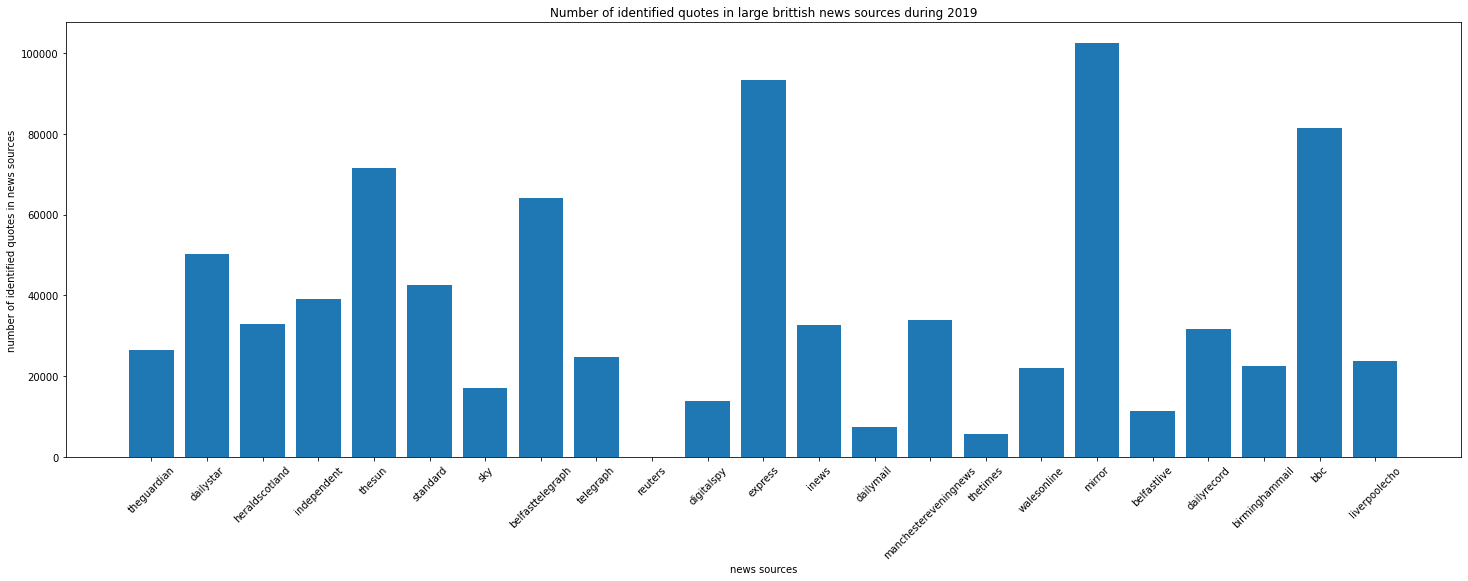

In [ ]:
import matplotlib.pyplot as plt
news_names = {source for sources in df.newspapers for source in sources}
quote_count = {source: 0 for source in news_names}
for newspaper in news_names:
  count = df.newspapers.map(lambda news_list: newspaper in news_list).sum()
  #print(f'number of quotes from {newspaper}: {count}')
  quote_count[newspaper] = count

fig, ax = plt.subplots(figsize=(25,8))
ax.bar(*zip(*quote_count.items()))
ax.set_xlabel('news sources')
ax.set_ylabel('number of identified quotes in news sources')
plt.xticks(rotation=45)
ax.set_title(f'Number of identified quotes in large brittish news sources during {YEAR}');

In [ ]:
news_names = {source for sources in df.newspapers for source in sources}
print(f'{len(news_names)} newspapers in {YEAR}')
missing_newspapers = [i for i in chosen_news if i not in news_names]
print(f'Newspapers not in {YEAR}: {missing_newspapers}')

23 newspapers in 2019
Newspapers not in 2019: ['newsnow', 'glasgowtimes']


2020

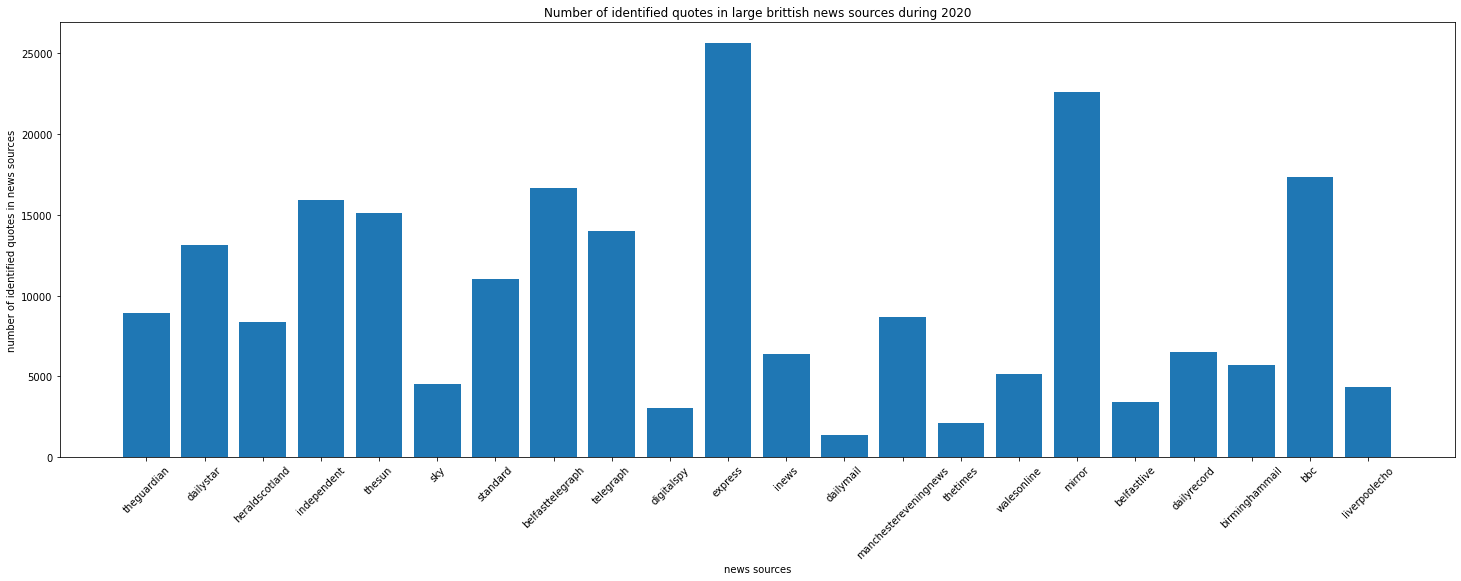

In [ ]:
import matplotlib.pyplot as plt
news_names = {source for sources in df.newspapers for source in sources}
quote_count = {source: 0 for source in news_names}
for newspaper in news_names:
  count = df.newspapers.map(lambda news_list: newspaper in news_list).sum()
  #print(f'number of quotes from {newspaper}: {count}')
  quote_count[newspaper] = count

fig, ax = plt.subplots(figsize=(25,8))
ax.bar(*zip(*quote_count.items()))
ax.set_xlabel('news sources')
ax.set_ylabel('number of identified quotes in news sources')
plt.xticks(rotation=45)
ax.set_title(f'Number of identified quotes in large brittish news sources during {YEAR}');

In [ ]:
news_names = {source for sources in df.newspapers for source in sources}
print(f'{len(news_names)} newspapers in {YEAR}')
missing_newspapers = [i for i in chosen_news if i not in news_names]
print(f'Newspapers not in {YEAR}: {missing_newspapers}')

22 newspapers in 2020
Newspapers not in 2020: ['newsnow', 'reuters', 'glasgowtimes']


In [ ]:
YEAR = 2020
path_to_file = PATH_TO_DATA + f'Quotebank/quotes-{YEAR}.json.bz2'
path_to_out = '/content/quotes-test.json.bz2'

with bz2.open(path_to_file, 'rb') as s_file:
    with bz2.open(path_to_out, 'wb') as d_file:
        for index, instance in enumerate(s_file):
            instance = json.loads(instance) # loading a sample
            urls = instance['urls'] # extracting list of links
            if any("dailymail" in url for url in urls):
                d_file.write((json.dumps(instance)+'\n').encode('utf-8'))
            if index == 500000:
              break
df = pd.read_json(path_to_out, lines=True, compression='bz2')
print(len(df))
df.sample(20)

1027


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
100,2020-03-20-073246,"Through our store connections, and through thi...","Camilla , Duchess of Cornwall",[Q152239],2020-03-20 12:47:06,1,"[[Camilla , Duchess of Cornwall, 0.5203], [Non...",[https://www.hulldailymail.co.uk/news/hull-eas...,E
567,2020-03-27-043767,Reports of people deliberately coughing on our...,Priti Patel,[Q575733],2020-03-27 07:41:30,5,"[[Priti Patel, 0.9428], [None, 0.0572]]",[https://www.getreading.co.uk/news/uk-world-ne...,E
979,2020-04-03-018580,I ain't doing this alone and there's only so m...,None,[],2020-04-03 03:28:00,3,"[[None, 0.7668], [Michael Goonan, 0.2332]]",[http://msn.com/en-au/entertainment/tv/married...,E
353,2020-03-18-050301,Our servicemen and women are committed to main...,Ben Wallace,"[Q263166, Q295364]",2020-03-18 22:23:00,71,"[[Ben Wallace, 0.8917], [None, 0.0922], [Gener...",[http://www.964eagle.co.uk/news/uk-news/306522...,E
1002,2020-02-10-106428,Working with people with disabilities and visu...,None,[],2020-02-10 23:06:58,1,"[[None, 0.5087], [Edward Moore, 0.4419], [Henr...",[http://www.thedailymail.net/news/columbiacoun...,E
261,2020-02-12-031209,"I competed, or traveled through every state, e...",None,[],2020-02-12 00:00:00,1,"[[None, 0.7094], [Robert Watts, 0.2906]]",[http://www.nevadadailymail.com/story/2668235....,E
632,2020-04-16-003341,And we all need a bit of cheering up sometimes.,Tom Moore,"[Q14950343, Q17306300, Q19577318, Q28813082, Q...",2020-04-16 07:15:53,10,"[[Tom Moore, 0.5704], [None, 0.3713], [Matt Ha...",[https://www.hulldailymail.co.uk/news/uk-world...,E
522,2020-03-06-081623,When we were trying to find clothing the items...,Joel Redhead,[Q3370645],2020-03-06 05:00:00,1,"[[Joel Redhead, 0.8096], [None, 0.1904]]",[https://www.hulldailymail.co.uk/whats-on/fami...,E
33,2020-02-13-127171,"You hope for a couple of years, but I really d...",None,[],2020-02-13 05:31:28,35,"[[None, 0.6517], [Bill Turnbull, 0.2719], [Sus...",[https://www.dailystar.co.uk/showbiz/piers-mor...,E
906,2020-03-25-081865,We are working hard to bring certainty to our ...,Richard Lewis,"[Q2150080, Q22097933, Q24007427, Q28354971, Q3...",2020-03-25 18:33:00,211,"[[Richard Lewis, 0.7286], [Andros Townsend, 0....",[http://skysports.com/tennis/news/32498/119636...,E


In [ ]:
df.loc[531,'urls']

['http://www.thedailymail.net/artsandlife/localannouncements/joseph-kusnick-joins-shaker-museum-board/article_c4f7f44e-c119-5f92-84bb-9f239de381ca.html',
 'http://www.thedailymail.net/artsandlife/localannouncements/joseph-kusnick-joins-shaker-museum-board/article_136833cb-ee46-5ad4-9d75-41e4dfc5df6b.html']